In [3]:
import tensorflow as tf
import pandas as pd

In [4]:
data = pd.read_csv(r'/home/viraj/Desktop/dataexport_20200423T201616.csv')

In [3]:
data = data.drop(data.index[[0,1,2,3,4,5,6,7,8,9]])# removing unnecessary rows
data.index = data.index-9

In [4]:
data.columns = ['variable','Tempertaure1','Temperature2','Temperature','Relative Humidity1','Relative Humidity2','Relative Humidity','Mean Sea Level Pressure1','Mean Sea Level Pressure2','Mean Sea Level Pressure','Precipitation Total','Cloud Cover Total','Wind Speed1','Wind Speed2','Wind Speed','Wind Direction']
data = data.drop(['variable'],axis = 1)
data = data.astype('float')

In [5]:
data.head()

,Tempertaure1,Temperature2,Temperature,Relative Humidity1,Relative Humidity2,Relative Humidity,Mean Sea Level Pressure1,Mean Sea Level Pressure2,Mean Sea Level Pressure,Precipitation Total,Cloud Cover Total,Wind Speed1,Wind Speed2,Wind Speed,Wind Direction
1,-4.039472,2.610529,-0.716971,59.0,96.0,73.500000,1012.3,1022.9,1018.27094,0.000000,33.625000,1.065600,14.748553,9.128243,110.169304
2,-1.179471,5.630528,1.312195,66.0,97.0,79.291664,1004.9,1012.2,1007.71246,0.000000,69.450000,2.397600,17.777086,12.331115,111.911980
3,-1.619471,9.200529,3.012196,60.0,96.0,80.000000,1007.6,1014.2,1010.79987,0.000000,56.333332,3.996000,14.099080,8.980708,114.188460
4,2.600528,10.950529,7.090530,57.0,89.0,70.583336,1008.6,1015.1,1012.06670,1.500000,96.708336,3.786256,18.504736,10.208410,201.784740
5,5.860529,8.540529,7.061361,76.0,98.0,90.250000,1006.1,1019.7,1013.62915,8.800001,90.500000,2.397600,18.921904,9.424890,246.239320


In [6]:
y = data['Precipitation Total'] 
X = data.drop(['Precipitation Total'],axis = 1)

In [7]:
X.head()

,Tempertaure1,Temperature2,Temperature,Relative Humidity1,Relative Humidity2,Relative Humidity,Mean Sea Level Pressure1,Mean Sea Level Pressure2,Mean Sea Level Pressure,Cloud Cover Total,Wind Speed1,Wind Speed2,Wind Speed,Wind Direction
1,-4.039472,2.610529,-0.716971,59.0,96.0,73.500000,1012.3,1022.9,1018.27094,33.625000,1.065600,14.748553,9.128243,110.169304
2,-1.179471,5.630528,1.312195,66.0,97.0,79.291664,1004.9,1012.2,1007.71246,69.450000,2.397600,17.777086,12.331115,111.911980
3,-1.619471,9.200529,3.012196,60.0,96.0,80.000000,1007.6,1014.2,1010.79987,56.333332,3.996000,14.099080,8.980708,114.188460
4,2.600528,10.950529,7.090530,57.0,89.0,70.583336,1008.6,1015.1,1012.06670,96.708336,3.786256,18.504736,10.208410,201.784740
5,5.860529,8.540529,7.061361,76.0,98.0,90.250000,1006.1,1019.7,1013.62915,90.500000,2.397600,18.921904,9.424890,246.239320


In [8]:
y

1       0.000000
2       0.000000
3       0.000000
4       1.500000
5       8.800001
          ...   
4491    0.000000
4492    0.500000
4493    0.000000
4494    0.000000
4495    0.000000
Name: Precipitation Total, Length: 4495, dtype: float64

In [9]:
import numpy as np

In [11]:
train_size = int(0.7*y.size)
test_size = int(0.3*y.size)

In [12]:
train_size

3146

In [13]:
X1 = (X-X.mean())/X.std()

In [14]:
X_train = X1[0:train_size]
X_test = X1[train_size:int(y.size)]

In [15]:
X_train = np.ravel(X_train)
X_train = X_train.reshape(3146,14)
X_test = np.ravel(X_test)
X_test = X_test.reshape(1349,14)
y_label = np.ravel(y_label)
y_train = y_label[0:train_size]
y_test = y_label[train_size:int(y.size)]

In [16]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
xtrain = sc.fit_transform(X_train)
xtest = sc.fit_transform(X_test)
xtrain = np.reshape(xtrain,(xtrain.shape[0],xtrain.shape[1],1))
xtest = np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [17]:
y = np.ravel(y)
ytrain = y[0:train_size]
ytest = y[train_size:int(y.size)]

In [18]:
model = tf.keras.models.Sequential()

In [19]:
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (xtrain.shape[1],1)))
model.add(tf.keras.layers.Dropout(0.2))

In [20]:
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

In [21]:
model.add(tf.keras.layers.LSTM(units = 50, return_sequences = True))
model.add(tf.keras.layers.Dropout(0.2))

In [22]:
model.add(tf.keras.layers.LSTM(units = 50))
model.add(tf.keras.layers.Dropout(0.2))

In [23]:
model.add(tf.keras.layers.Dense(units=1))

In [24]:
model.compile(optimizer='adam',loss = 'mean_squared_error')

In [25]:
model.fit(xtrain,ytrain,epochs = 50,batch_size=32)

Train on 3146 samples
Epoch 1/50
3146/3146 [==============================] - 29s 9ms/sample - loss: 14.2495
Epoch 2/50
3146/3146 [==============================] - 8s 3ms/sample - loss: 14.0764
Epoch 3/50
3146/3146 [==============================] - 9s 3ms/sample - loss: 13.9676
Epoch 4/50
3146/3146 [==============================] - 9s 3ms/sample - loss: 13.9769
Epoch 5/50
3146/3146 [==============================] - 9s 3ms/sample - loss: 13.7935
Epoch 6/50
3146/3146 [==============================] - 9s 3ms/sample - loss: 13.4961
Epoch 7/50
3146/3146 [==============================] - 10s 3ms/sample - loss: 13.5204
Epoch 8/50
3146/3146 [==============================] - 10s 3ms/sample - loss: 13.4773
Epoch 9/50
3146/3146 [==============================] - 10s 3ms/sample - loss: 12.7728
Epoch 10/50
3146/3146 [==============================] - 13s 4ms/sample - loss: 11.8924
Epoch 11/50
3146/3146 [==============================] - 9s 3ms/sample - loss: 10.9023
Epoch 12/50
3146/3146 [==

In [26]:
xtest.shape

(1349, 14, 1)

In [27]:
predx = xtest    #temp variable
predy = ytest    #temp variable

In [28]:
pred_rain = model.predict(predx)

In [29]:
print(pred_rain)

[[0.06263527]
 [0.07151228]
 [0.05926365]
 ...
 [2.7056773 ]
 [0.01757079]
 [0.02184284]]


In [30]:
pred_rain=np.reshape(pred_rain,(pred_rain.size,))

In [31]:
print(pred_rain)

[0.06263527 0.07151228 0.05926365 ... 2.7056773  0.01757079 0.02184284]


In [32]:
import matplotlib.pyplot as plt

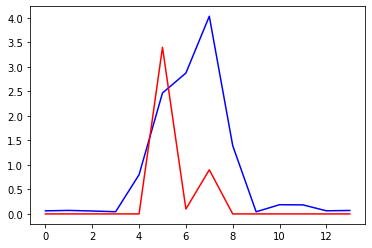

In [33]:
plt.plot(pred_rain[0:14], color='b')  #predicted rainfall
plt.plot(predy[0:14], color = 'r')    #actual rainfall

In [35]:
from sklearn.metrics import mean_absolute_error as mse

In [36]:
mse(pred_rain,predy)

1.3683083012467483

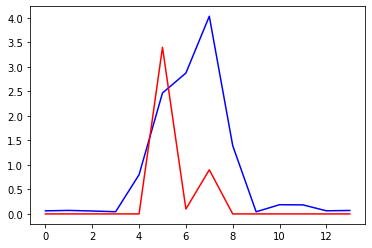

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 1.5039


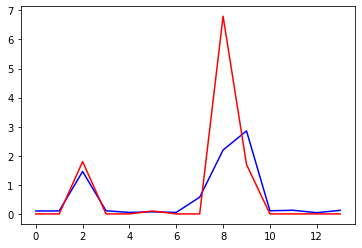

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 1.9697


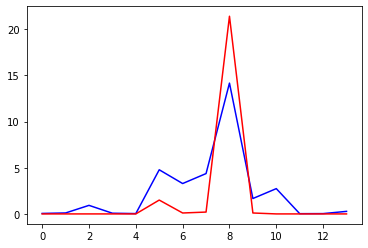

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 8.9379


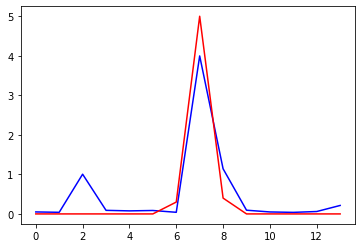

Train on 14 samples
14/14 [==============================] - 0s 19ms/sample - loss: 0.2155


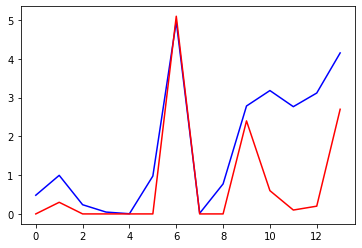

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 2.1362


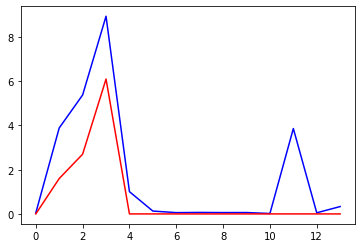

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 2.5355


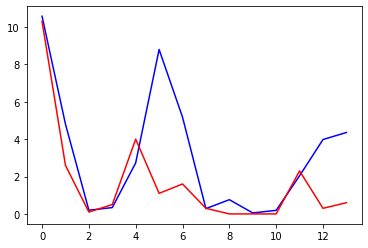

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 7.4837


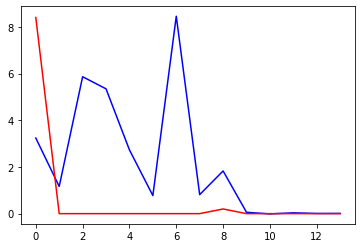

Train on 14 samples
14/14 [==============================] - 0s 4ms/sample - loss: 9.9922


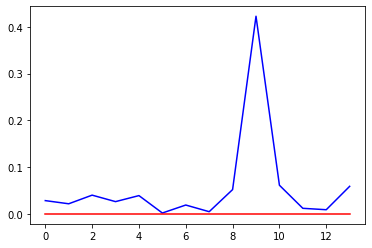

Train on 14 samples
14/14 [==============================] - 0s 20ms/sample - loss: 0.0055


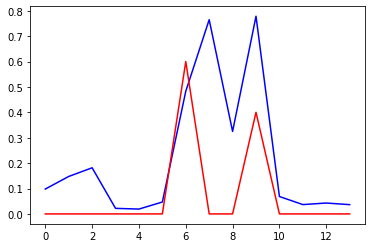

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 0.1299


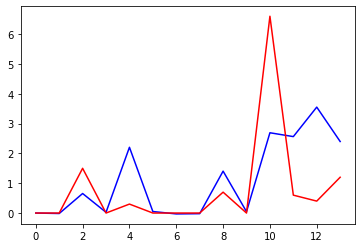

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 2.2497


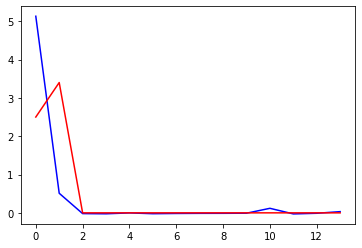

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 1.0689


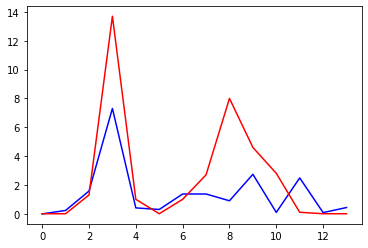

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 8.1922


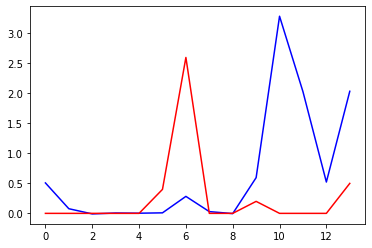

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 1.8319


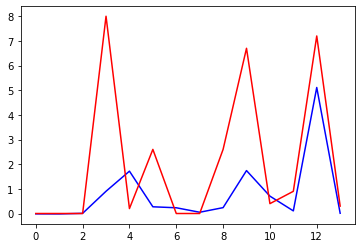

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 7.8944


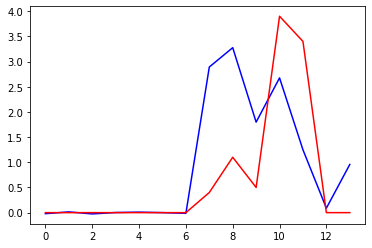

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 1.4158


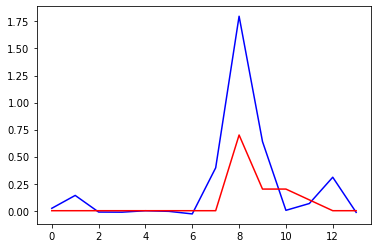

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 0.2705


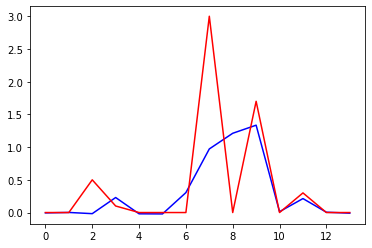

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 0.3955


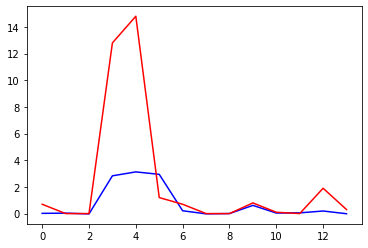

Train on 14 samples
14/14 [==============================] - 0s 10ms/sample - loss: 18.7400


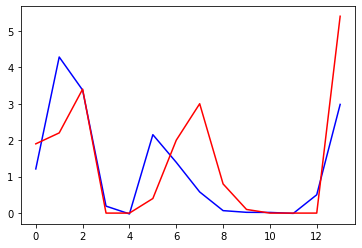

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 1.7839


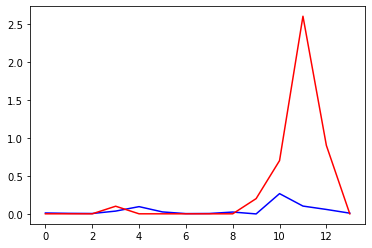

Train on 14 samples
14/14 [==============================] - 0s 10ms/sample - loss: 0.5193


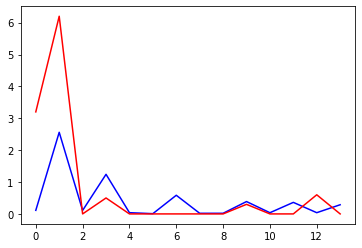

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.6651


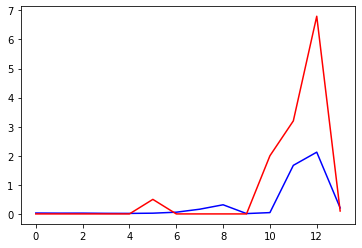

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 3.0358


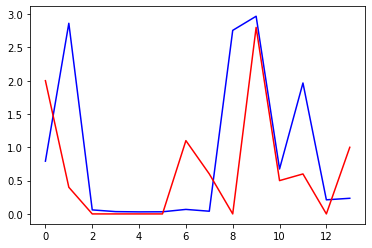

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 1.3611


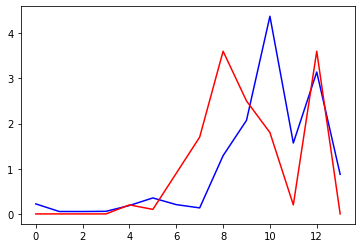

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 1.1222


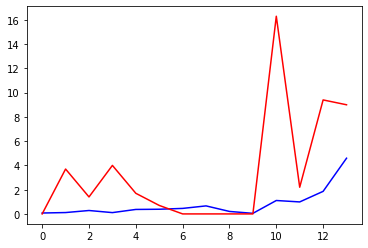

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 25.2623


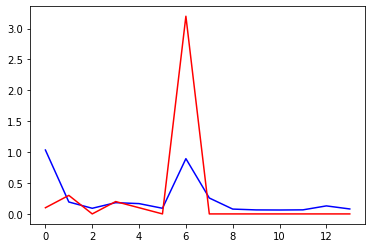

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 0.3753


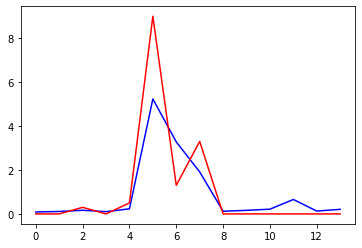

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 2.3287


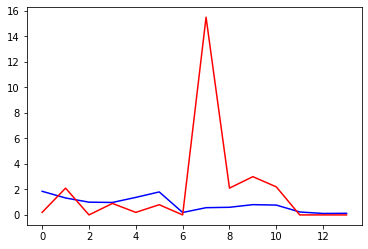

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 17.5536


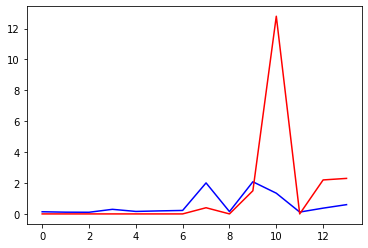

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 10.4958


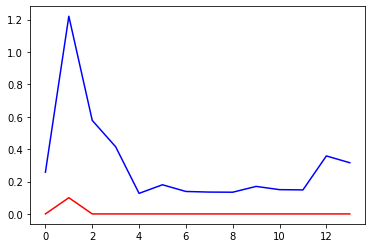

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 0.1834


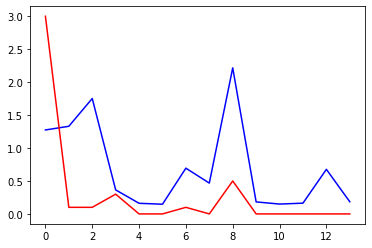

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 0.7709


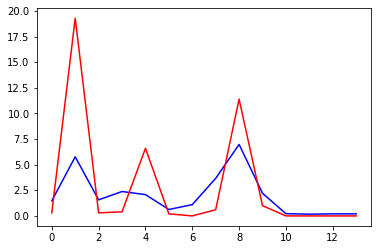

Train on 14 samples
14/14 [==============================] - 0s 17ms/sample - loss: 18.6477


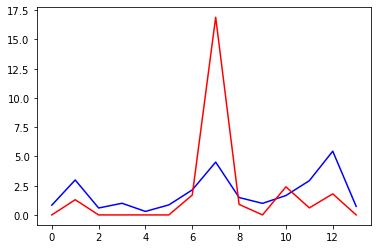

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 11.6462


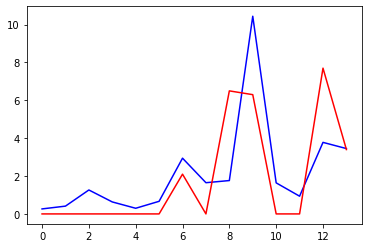

Train on 14 samples
14/14 [==============================] - 0s 23ms/sample - loss: 4.1358


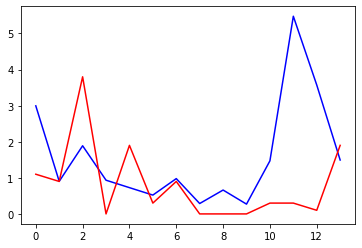

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 3.9901


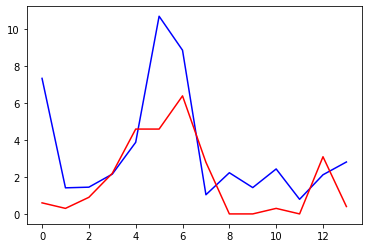

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 7.3670


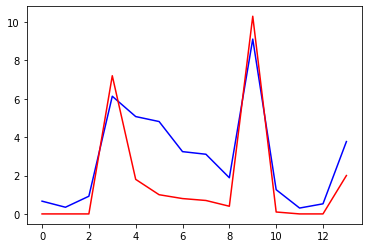

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 3.5532


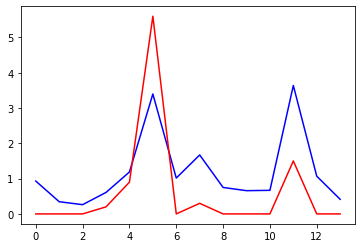

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.3733


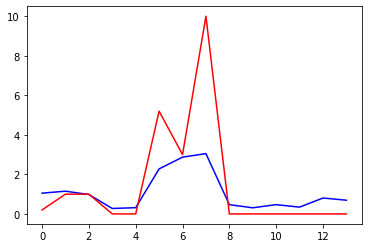

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 3.7111


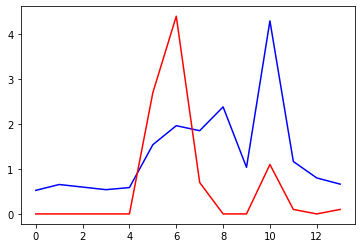

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.6254


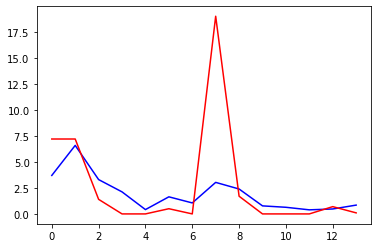

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 20.3696


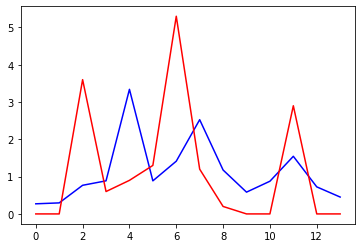

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 2.6304


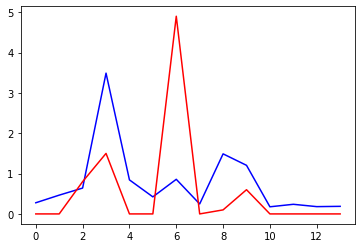

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 1.8727


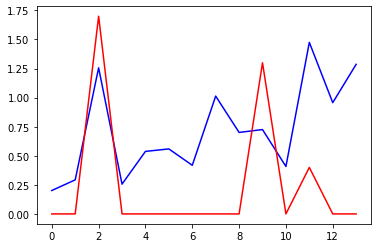

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 0.4936


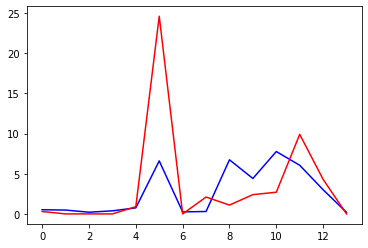

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 28.5513


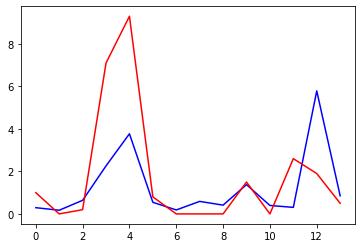

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 5.7490


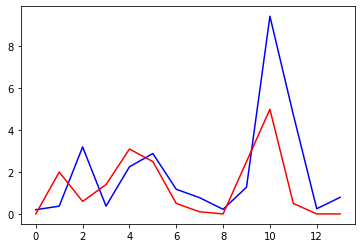

Train on 14 samples
14/14 [==============================] - 0s 7ms/sample - loss: 3.8830


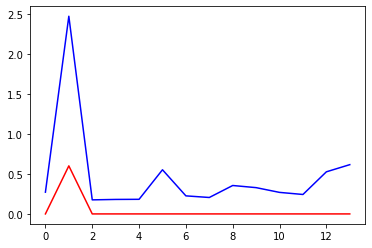

Train on 14 samples
14/14 [==============================] - 0s 6ms/sample - loss: 0.3012


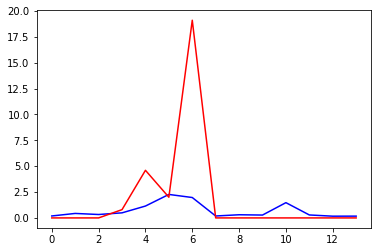

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 21.6916


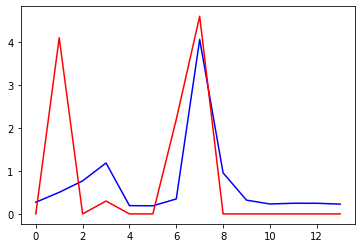

Train on 14 samples
14/14 [==============================] - 0s 17ms/sample - loss: 1.5906


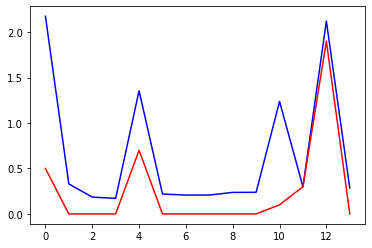

Train on 14 samples
14/14 [==============================] - 0s 13ms/sample - loss: 0.2468


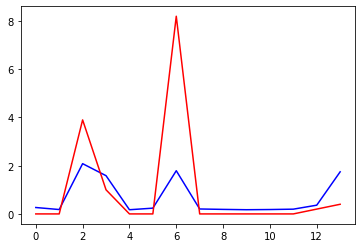

Train on 14 samples
14/14 [==============================] - 0s 10ms/sample - loss: 4.1063


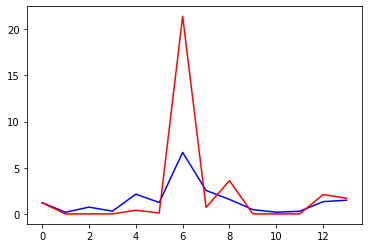

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 18.9762


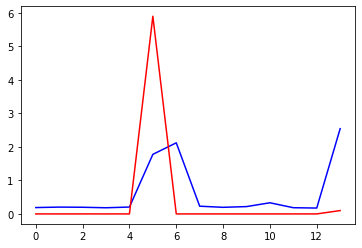

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 2.3619


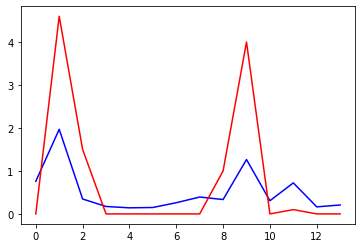

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 1.2184


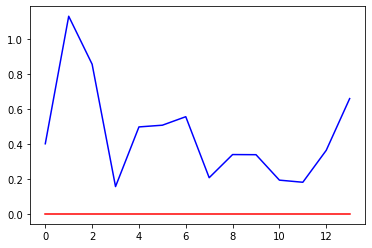

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 0.2545


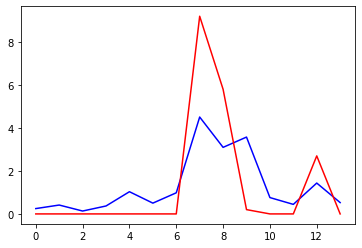

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 3.5902


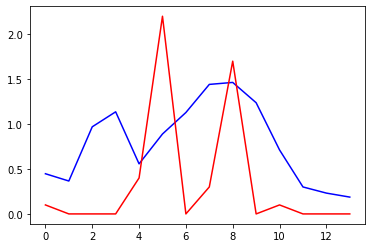

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 0.5169


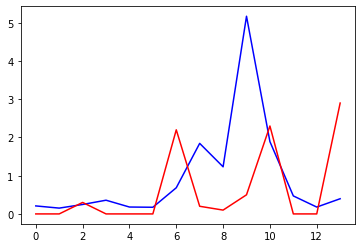

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 2.3973


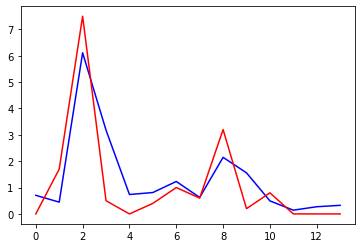

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.5637


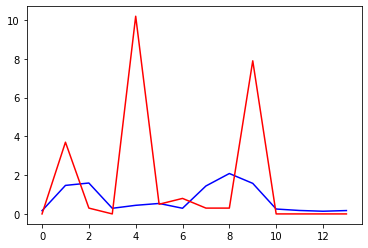

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 11.5323


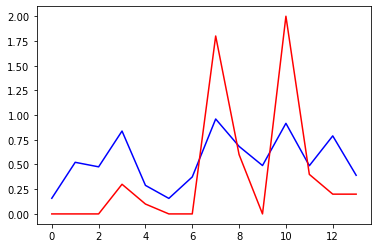

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 0.2819


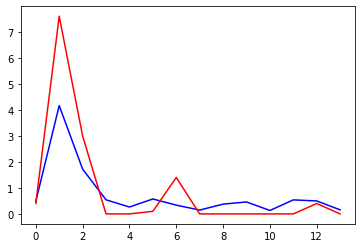

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 0.6874


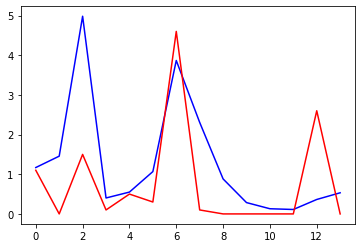

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 2.3695


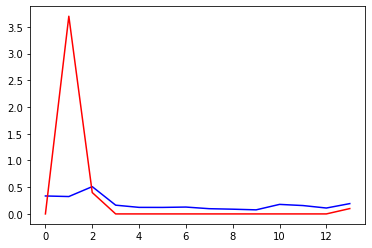

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 0.8450


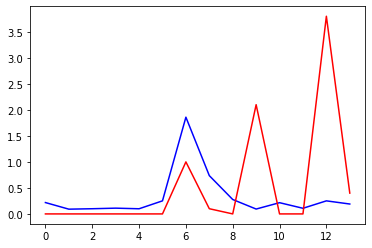

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.2420


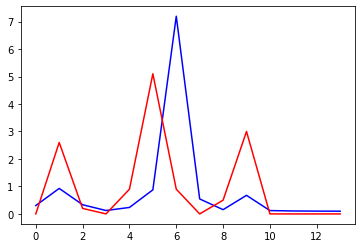

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 4.8447


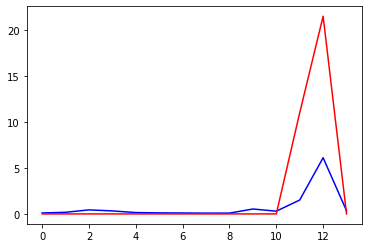

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 23.3915


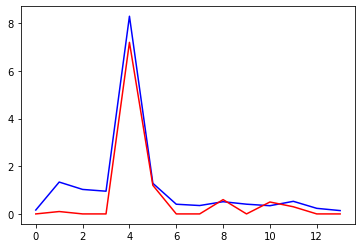

Train on 14 samples
14/14 [==============================] - 0s 10ms/sample - loss: 0.2839


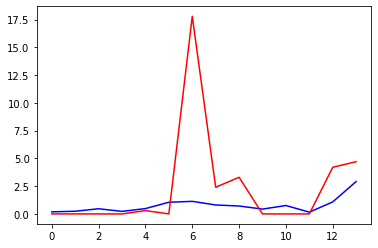

Train on 14 samples
14/14 [==============================] - 0s 22ms/sample - loss: 21.6116


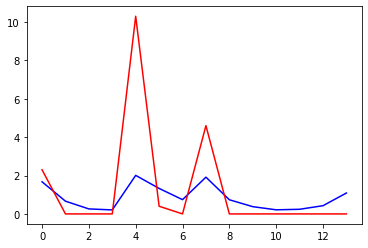

Train on 14 samples
14/14 [==============================] - 0s 19ms/sample - loss: 5.1610


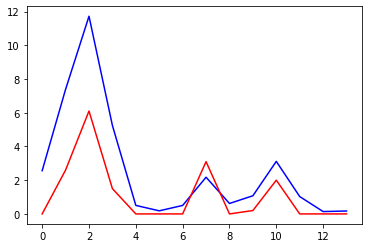

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 5.8737


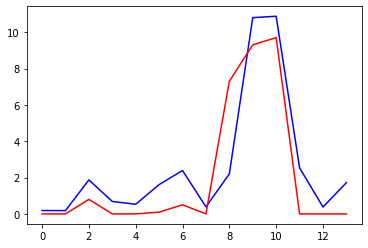

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 4.1516


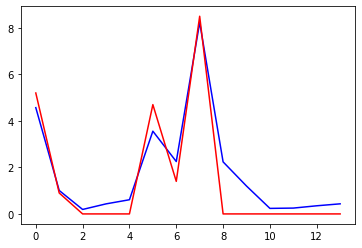

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 0.9586


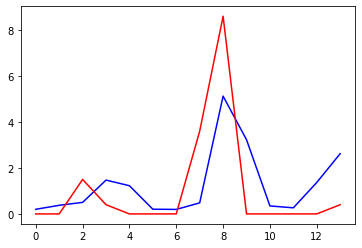

Train on 14 samples
14/14 [==============================] - 0s 11ms/sample - loss: 3.4164


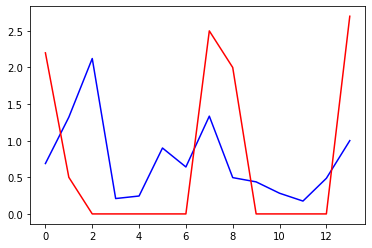

Train on 14 samples
14/14 [==============================] - 0s 19ms/sample - loss: 1.1587


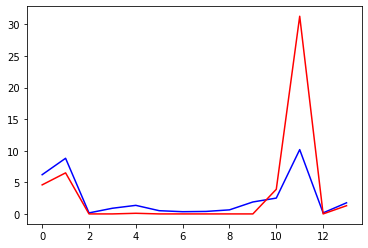

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 35.4392


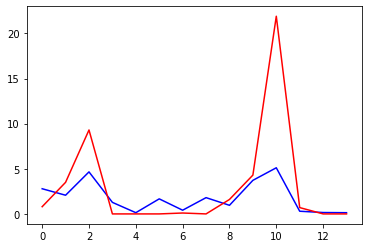

Train on 14 samples
14/14 [==============================] - 0s 10ms/sample - loss: 24.8756


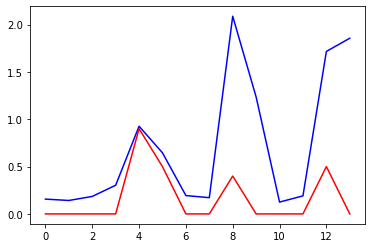

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.0103


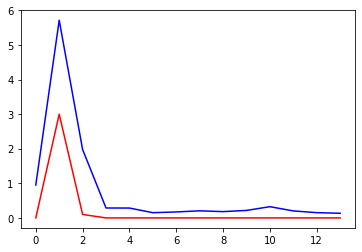

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 0.4281


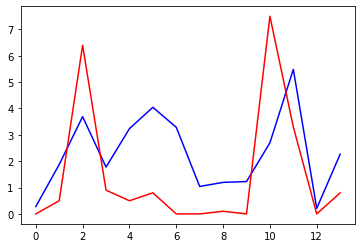

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 6.1983


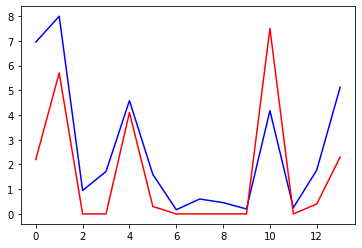

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 3.9692


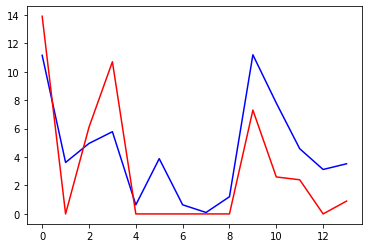

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 7.6952


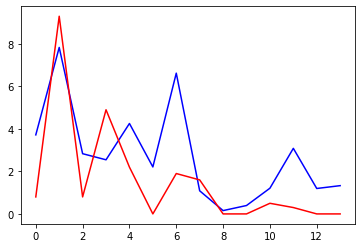

Train on 14 samples
14/14 [==============================] - 0s 5ms/sample - loss: 4.4634


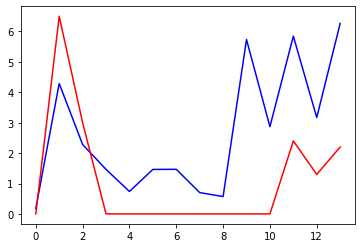

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 7.2248


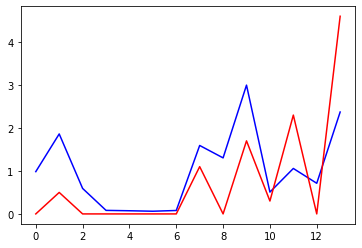

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 1.1163


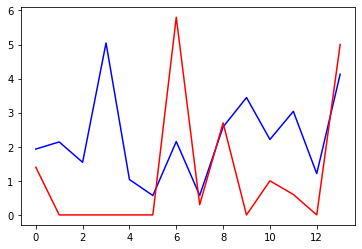

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 5.7485


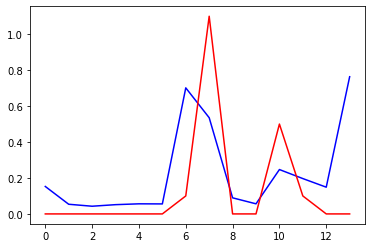

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 0.1004


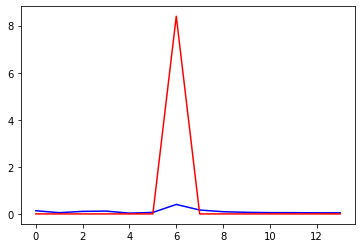

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 4.5658


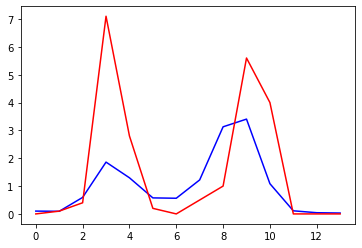

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 3.9290


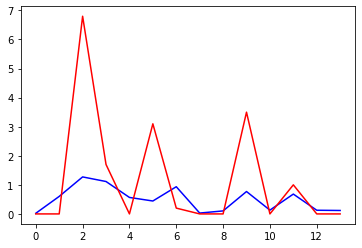

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 3.1687


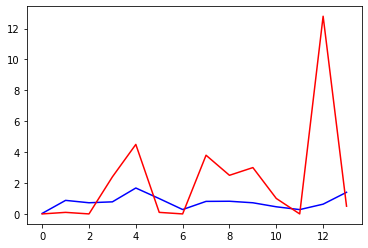

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 13.5779


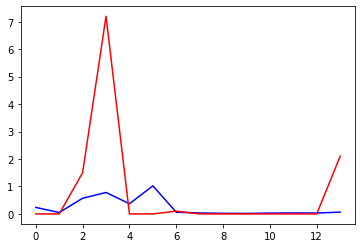

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 3.2728


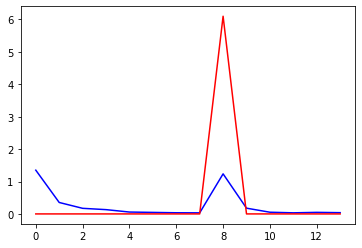

Train on 14 samples
14/14 [==============================] - 0s 8ms/sample - loss: 2.0262


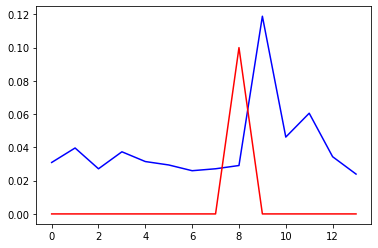

Train on 14 samples
14/14 [==============================] - 0s 9ms/sample - loss: 0.0074


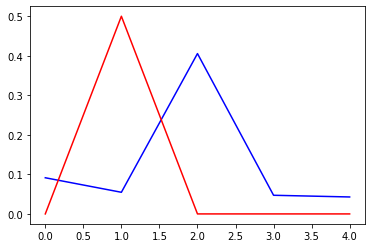

Train on 5 samples
5/5 [==============================] - 0s 22ms/sample - loss: 0.0575


In [37]:
#predicting as well as updating
mae = 0
maei = []
i = 0
while(i<ytest.size):
    plt.plot(model.predict(xtest[i:i+14]),color = 'b')
    plt.plot(predy[i:i+14], color = 'r')
    plt.show()
    if (i+14<ytest.size):
        inc=14
    else:
        ytest.size-i
    new = mse(predy[i:i+inc],model.predict(xtest[i:i+inc]))
    mae =  (mae*i + new*inc)/(i+inc)
    model.fit(xtest[i:i+14],ytest[i:i+14])
    i = i+14